# Linear Regression Project

Data: Ecommerce Customers

Problem: Decide whether to focus their efforts on their mobile app experience or their website.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib.style
import matplotlib as mpl
mpl.style.use('seaborn')

%matplotlib inline

## Load the Data

In [3]:
customers = pd.read_csv('Ecommerce Customers')

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## Exploratory Data Analysis

In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Data Visualization

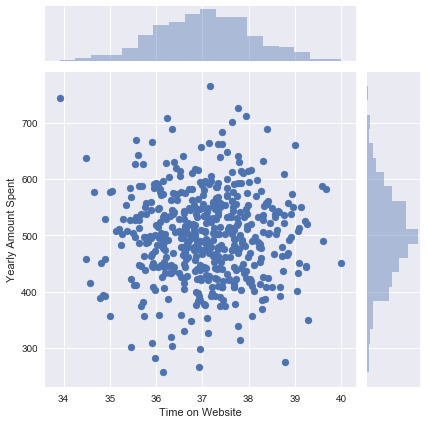

In [8]:
sns.jointplot(data=customers,x='Time on Website',y='Yearly Amount Spent')

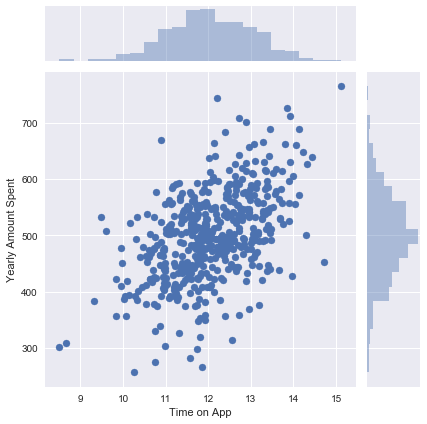

In [9]:
sns.jointplot(data=customers,x='Time on App',y='Yearly Amount Spent')

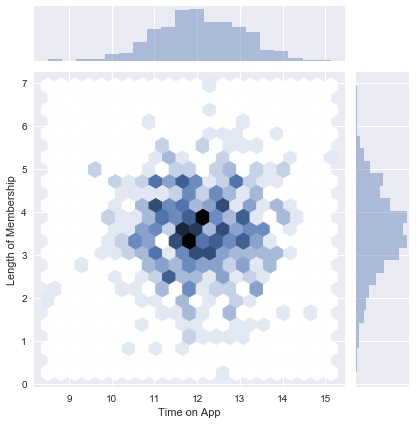

In [13]:
sns.jointplot(data=customers,x='Time on App',y='Length of Membership',kind='hex')

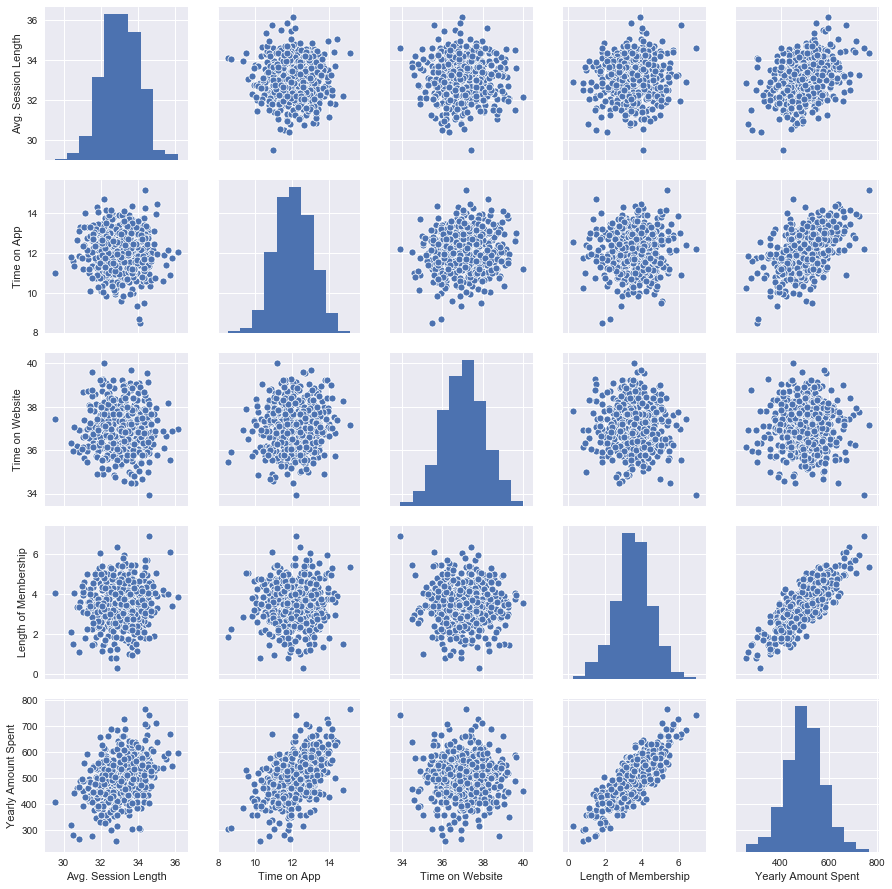

In [14]:
sns.pairplot(customers)

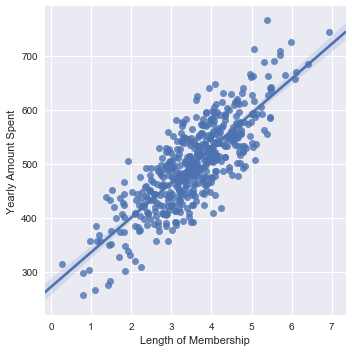

In [18]:
sns.lmplot(data=customers,x='Length of Membership',y='Yearly Amount Spent')

## Splitting the Data into Training and Testing

In [19]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [20]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Print out the coefficients of the model**

In [27]:
print('Coeficients:\n',lm.coef_)
print('')
print('Intercept:\n',lm.intercept_)

Coeficients:
 [25.98154972 38.59015875  0.19040528 61.27909654]

Intercept:
 -1047.932782250239


## Predicting Test Data

In [29]:
predictions = lm.predict(X_test)

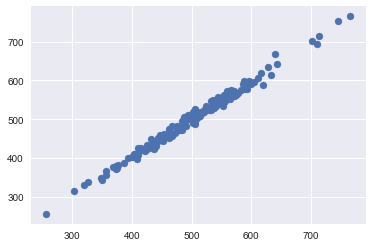

In [30]:
plt.scatter(y_test,predictions)

## Evaluating the Model

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.2281486534308295
MSE: 79.8130516509743
RMSE: 8.933815066978626


In [36]:
print('R squared:',metrics.explained_variance_score(y_test,predictions))

R squared: 0.9890771231889607


## Residuals

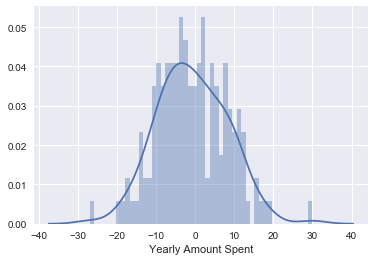

In [39]:
sns.distplot((y_test-predictions),bins=50)

## Conclusion

In [34]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**Answer to the problem:**

Seing how the website represents much less impact on the total sales, this is the platform that should be invested